In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

============ag train============
----------Running:1701----------


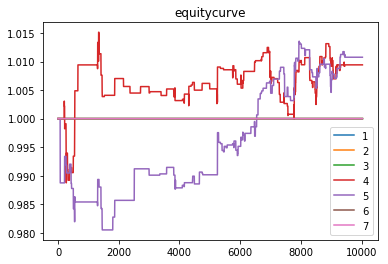

In [12]:
# %load main.py
# Remember to update your path
import sys
sys.path.append('/home/rz14/Documents/QR_Qishi/QishiQR/')

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pickle

from Utils.IOUtils import *
from Utils.lm import *
from Backtesting.Vectorized.Strategy import MovingAverageStrategy, SLMStrategy
from Backtesting.Vectorized.backtest import vectorizedbacktest
from Backtesting.Vectorized.cross_compare import ensembler

# ====== Initial Configuration ========
model_order = 7
freq = '5min'
offset = 0
tca = None

start = '20160701'
end = '20161031'

ROOT_DIR = "/home/rz14/Documents/QR_Qishi/QishiQR/"
DATA_DIR = "/home/rz14/Documents/QR_Qishi/tick2016/"
OUTPUT_DIR = "/home/rz14/Documents/QR_Qishi/QishiQR/Output/"
ASSET = 'ag'
ASSET_PATH = Path(OUTPUT_DIR, ASSET)
ASSET_PATH.mkdir(exist_ok=True, parents=True)

import warnings
warnings.filterwarnings(action='ignore')
# ========= Build SLM table ==========

slm = LM_model(data_root_dir=str(DATA_DIR),n=model_order)
word_table = slm.LM(commodity='ag', exp_list=['1701'], offset=0, flg='train')
# word_prob_tables = pickle.load(open('word_prob_tables.p','rb'))
# offset = np.linspace(0,5,5, endpoint=False)

# ========== Read Data =================
commodity = ASSET
exp_date = '1701'

def compile_signal(data, slm, max_order=8):
    slm = slm[['prior', 'max']]
    slm = slm.rename(columns={'max': 'signal'})
    signals = [SLMStrategy(data, slm, m).generatingsignal() for m in np.arange(1, max_order+1)]
    return signals

data = vectorizedbacktest.compile_data(DATA_DIR, commodity, exp_date, start='20160701',end='20161031')
signals = compile_signal(data,word_table, max_order=model_order)

tester_ensemble = ensembler(vectorizedbacktest, signals, tcas=tca)
tester_ensemble.build()
tester_ensemble.run()
tester_ensemble.calperformance()
tester_ensemble.plot()

In [10]:
tester_ensemble.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
Model Order,,,,,,,,,,,,,
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
3,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
4,0.040139,0.000099,-0.001294,0.001298,0.000017,-0.008801,0.006188,-0.014986,1.003097,0.617283,566,1.009415,0.157244
5,0.037766,0.000113,-0.001359,0.001358,0.000022,-0.011262,0.007382,-0.019500,0.998749,0.749237,491,1.010752,0.146640
6,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
7,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
